# Google Maps

**Inhalt:** Zwei Anwendungen mit Google Maps in Geopandas

**Nötige Skills**
- Requests
- Geopandas Basics und Plotting

**Lernziele**
- Einfache Anwendung und Kennenlernen der Google Maps API

### Setup

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
import requests

In [3]:
import shapely

In [4]:
from shapely.geometry import Point, LineString

In [5]:
from IPython.display import Image

In [6]:
import os

In [7]:
import polyline

In [8]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [9]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

## 0. API einrichten

Wir gehen hier nicht im Detail darauf ein, welche Schritte notwendig sind.

Die wichtigsten Eckpunkte:

1. Zugang einrichten auf https://console.cloud.google.com/
1. Projekt definieren
1. API-Key generieren
1. Bestimmte API's freischalten

Am Schluss sollte das ungefähr so aussehen:

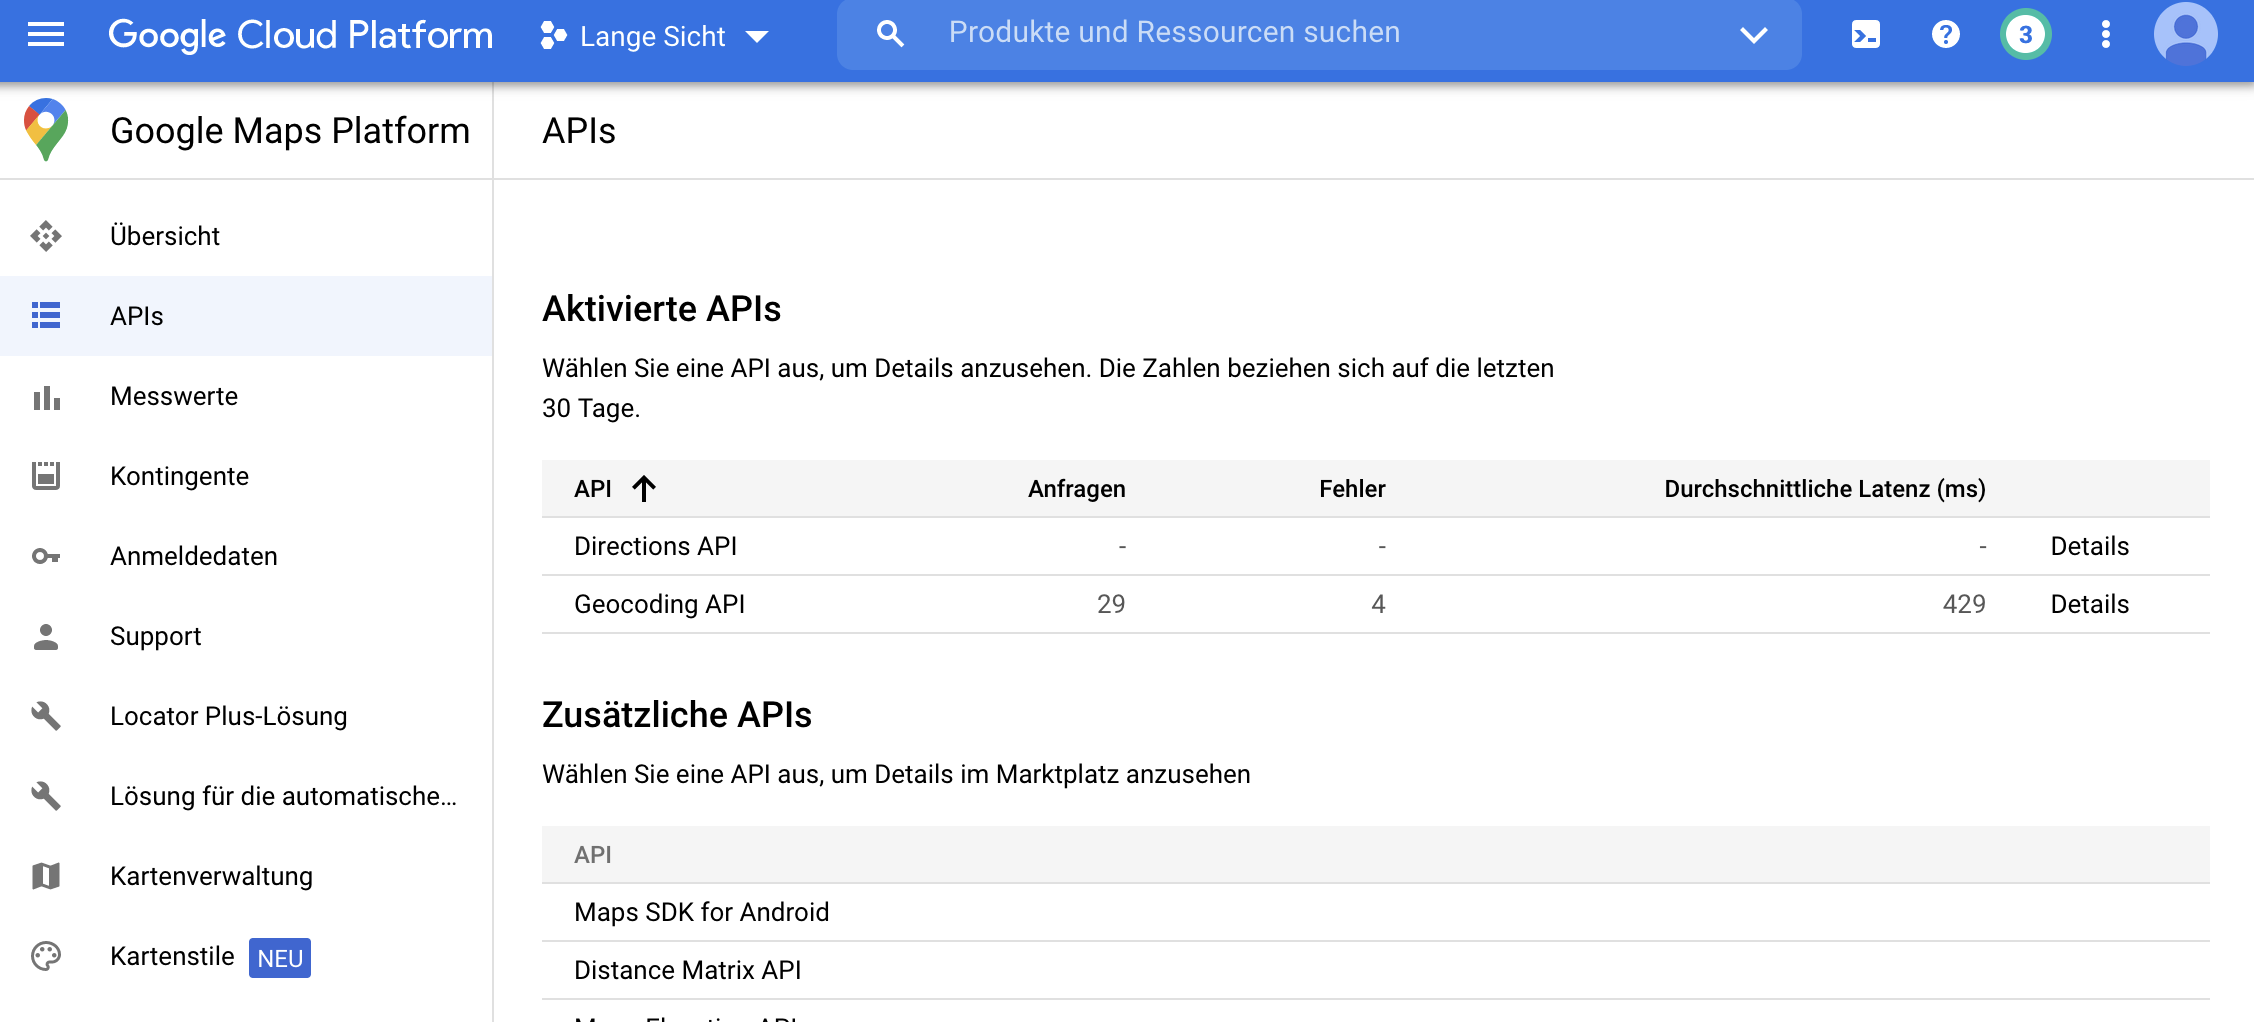

In [10]:
Image("dataprojects/GoogleMaps/google-console.png")

### API-Key

Und ihr solltet einen **API-Key** haben. Am besten speichert ihr den als Systemvariable:

(wie das geht, steht hier: https://www.nylas.com/blog/making-use-of-environment-variables-in-python/)

In [11]:
api_key = "......"

## 1. Geo-Koordinaten

Mit der Google Maps Api fragen wir einfache Geokoordinaten ausgehend von einer Adresse ab.

Infos zur Geocoding API:
- https://developers.google.com/maps/documentation/geocoding/start
- https://developers.google.com/maps/documentation/geocoding/overview


### Das Beispiel

Flüge ab Zürich in Europäische Destinationen: Strecken nach Anteil der Passagiere visualisieren.

### Daten laden

In [12]:
df = pd.read_excel('dataprojects/GoogleMaps/ZRH-Destinations-Europe.xlsx')

/Users/simon/opt/anaconda3/envs/CAS-Datenjournalismus-22/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
df.head(5)

,Rang,Destination,Kuerzel,Sitzplätze,Prozent,Status
0,1,London Heathrow,LHR,15490,6.15,Comp
1,2,Wien,VIE,12928,5.13,Mono
2,3,Amsterdam,AMS,11786,4.68,Comp
3,4,Frankfurt,FRA,10542,4.19,Mono
4,5,Genf,GVA,9751,3.87,Mono


In [14]:
df.shape

(30, 6)

### API Anfragen

Wir benutzen das Flughafenkürzel, um eine Abfrage nach dem folgenden Schema zu machen (Bsp London Heathrow, LHR)

`https://maps.googleapis.com/maps/api/geocode/json?address=LHR_Airport`

In [15]:
base_url = 'https://maps.googleapis.com/maps/api/geocode/json?address='

In [16]:
def get_coordinates(row):
    url = base_url + row['Kuerzel'] + '_Airport' + '&key=' + api_key
    response = requests.get(url)
    json = response.json()
    lat = json['results'][0]['geometry']['location']['lat']
    lng = json['results'][0]['geometry']['location']['lng']
    print(row['Kuerzel'], json['status'])
    s = pd.Series([lat, lng], index=['lat', 'lng'])
    
    return s

In [17]:
df[['lat', 'lng']] = df.apply(get_coordinates, axis=1)

LHR OK
VIE OK
AMS OK
FRA OK
GVA OK
DUS OK
HAM OK
TXL OK
CDG OK
MAD OK
BCN OK
MUC OK
LCY OK
FCO OK
LIS OK
CPH OK
IST OK
ARN OK
ATH OK
BRU OK
MXP OK
CGN OK
WAW OK
BEG OK
PRG OK
NCE OK
VCE OK
BUD OK
HAJ OK
STR OK


In [18]:
df

,Rang,Destination,Kuerzel,Sitzplätze,Prozent,Status,lat,lng
0,1,London Heathrow,LHR,15490,6.15,Comp,51.470022,-0.454296
1,2,Wien,VIE,12928,5.13,Mono,48.112612,16.575514
2,3,Amsterdam,AMS,11786,4.68,Comp,52.310539,4.768274
3,4,Frankfurt,FRA,10542,4.19,Mono,50.037933,8.562152
4,5,Genf,GVA,9751,3.87,Mono,46.236979,6.109089
5,6,Düsseldorf,DUS,9206,3.66,Mono,51.287615,6.766791
6,7,Hamburg,HAM,9200,3.65,Comp,53.633622,9.997413
7,8,Berlin Tegel,TXL,9083,3.61,Comp,52.558833,13.288437
8,9,Paris Charle de Ggaulle,CDG,8719,3.46,Comp,49.008071,2.550944
9,10,Madrid Barajas,MAD,7038,2.79,Comp,40.498332,-3.567598


Ergebnis zwischenspeichern

In [19]:
df.to_csv('dataprojects/GoogleMaps/Airport-coordinates.csv', index=False)

### Strecken plotten

#### Hintergrundkarte laden:

Eine Karte mit den Europäischen Ländern.

In [20]:
gdf_europe = gpd.read_file("dataprojects/GoogleMaps/europe.geojson")

In [21]:
gdf_europe.head()

,FID,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,0.0,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
1,0.0,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
2,0.0,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
3,0.0,BK,BA,BIH,70,Bosnia and Herzegovina,5120,3915238,150,39,17.786,44.169,"POLYGON ((17.64984 42.88908, 17.57853 42.94382..."
4,0.0,BU,BG,BGR,100,Bulgaria,11063,7744591,150,151,25.231,42.761,"POLYGON ((27.87917 42.84110, 27.89500 42.80250..."


#### Flughafenkoordinaten laden:

In [22]:
df = pd.read_csv('dataprojects/GoogleMaps/Airport-coordinates.csv')

In [23]:
df.head(5)

,Rang,Destination,Kuerzel,Sitzplätze,Prozent,Status,lat,lng
0,1,London Heathrow,LHR,15490,6.15,Comp,51.470022,-0.454296
1,2,Wien,VIE,12928,5.13,Mono,48.112612,16.575514
2,3,Amsterdam,AMS,11786,4.68,Comp,52.310539,4.768274
3,4,Frankfurt,FRA,10542,4.19,Mono,50.037933,8.562152
4,5,Genf,GVA,9751,3.87,Mono,46.236979,6.109089


#### Geometrien definieren

In [24]:
df['zielpunkt'] = df.apply(lambda row: Point(row['lng'], row['lat']), axis=1)

In [25]:
#Zurich coordinates
zrh_lat = 47.458217
zrh_lng = 8.555476

In [26]:
df['verbindung'] = df.apply(lambda row: LineString([Point(row['lng'], row['lat']), Point(zrh_lng, zrh_lat)]), axis=1)

#### Geodatenframe erstellen

In [30]:
gdf = gpd.GeoDataFrame(df, geometry='zielpunkt')

In [32]:
gdf = gdf.set_crs('epsg:4326')

In [33]:
gdf = gdf.to_crs(gdf_europe.crs)

In [34]:
gdf.head()

,Rang,Destination,Kuerzel,Sitzplätze,Prozent,Status,lat,lng,zielpunkt,verbindung
0,1,London Heathrow,LHR,15490,6.15,Comp,51.470022,-0.454296,POINT (-0.45430 51.47002),"LINESTRING (-0.4542955 51.4700223, 8.555476 47..."
1,2,Wien,VIE,12928,5.13,Mono,48.112612,16.575514,POINT (16.57551 48.11261),"LINESTRING (16.5755139 48.1126125, 8.555476 47..."
2,3,Amsterdam,AMS,11786,4.68,Comp,52.310539,4.768274,POINT (4.76827 52.31054),"LINESTRING (4.7682744 52.3105386, 8.555476 47...."
3,4,Frankfurt,FRA,10542,4.19,Mono,50.037933,8.562152,POINT (8.56215 50.03793),"LINESTRING (8.562151799999999 50.0379326, 8.55..."
4,5,Genf,GVA,9751,3.87,Mono,46.236979,6.109089,POINT (6.10909 46.23698),"LINESTRING (6.109088799999999 46.2369794, 8.55..."


#### Plot vorbereiten

In [35]:
destination_size = df['Prozent'] * 70

In [36]:
line_size = df['Prozent'] * 1.5

#### Der eigentliche Plot

Text(0.5, 1.0, 'Flugstrecken und Volumen ab Zürich Flughafen')

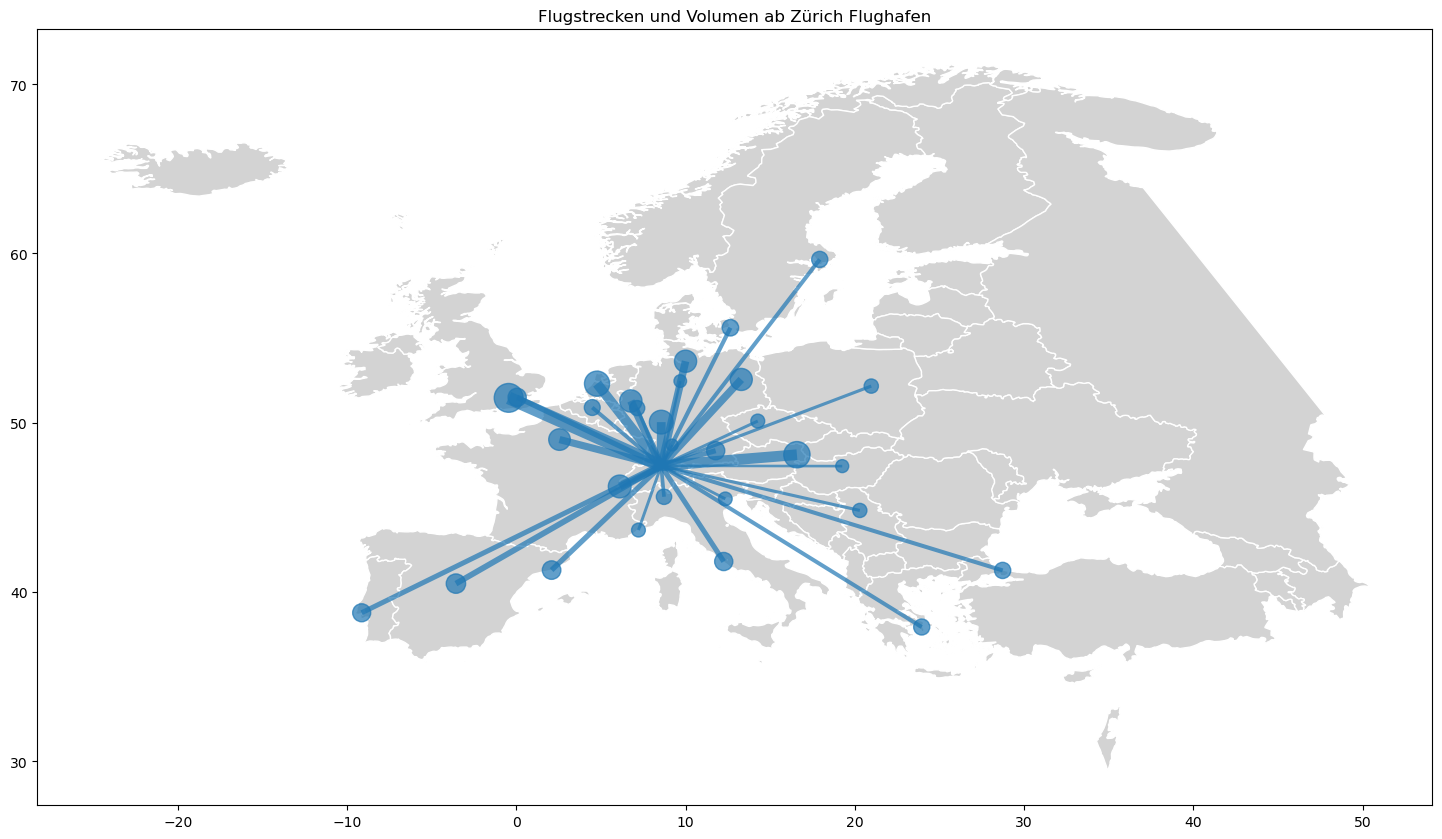

In [37]:
# Europakarte
ax = gdf_europe.plot(
    figsize=(18,18),
    color='lightgrey',
    edgecolor='white'
)

# Flughäfen als Punkte
gdf.plot(ax=ax, markersize=destination_size, alpha=0.7)

# Strecken als Linien
gdf.set_geometry('verbindung').plot(ax=ax, linewidth=line_size, alpha=0.7)

ax.set_title("Flugstrecken und Volumen ab Zürich Flughafen")

## 2. Wegstrecken

Mit der Google-Maps-Api fragen wir nach einer Wegstrecke zwischen zwei Punkten.

Infos zur Google Directions API:

- https://developers.google.com/maps/documentation/directions/get-directions
- https://developers.google.com/maps/documentation/directions/quickstart


### Das Beispiel

Weg von Zermatt zum MAZ, mit Bahn und zu Fuss.

### Daten beschaffen

In [38]:
base_url = 'https://maps.googleapis.com/maps/api/directions/json?'

In [39]:
origin = "Zermatt, Switzerland"
destination = "Murbacherstrasse 3, Luzern, Switzerland"

Modes: 

- DRIVING (default)
- WALKING
- TRANSIT (i.e. public transport)
- ...

In [40]:
mode = "transit" 

In [41]:
transit_mode = "rail"

In [42]:
url = base_url + "origin=" + origin + "&destination=" + destination + "&mode=" + mode + "&transit_mode=" + transit_mode + "&key=" + api_key

In [43]:
response = requests.get(url)

In [44]:
json = response.json()

In [45]:
json['status']

'OK'

### Daten umstrukturieren

Die Reise ist in verschiedene Schritte ("Legs") unterteilt...

In [46]:
route = json['routes'][0]['legs'][0]

In [47]:
route

{'arrival_time': {'text': '6:07pm',
  'time_zone': 'Europe/Zurich',
  'value': 1662394064},
 'departure_time': {'text': '2:37pm',
  'time_zone': 'Europe/Zurich',
  'value': 1662381420},
 'distance': {'text': '244 km', 'value': 243855},
 'duration': {'text': '3 hours 31 mins', 'value': 12644},
 'end_address': 'Murbacherstrasse 3, 6003 Luzern, Switzerland',
 'end_location': {'lat': 47.048521, 'lng': 8.3089335},
 'start_address': '3920 Zermatt, Switzerland',
 'start_location': {'lat': 46.0248306, 'lng': 7.748230899999999},
 'steps': [{'distance': {'text': '34.9 km', 'value': 34904},
   'duration': {'text': '1 hour 9 mins', 'value': 4140},
   'end_location': {'lat': 46.2939506, 'lng': 7.8816509},
   'html_instructions': 'Train towards Visp',
   'polyline': {'points': 'ef|wGmihn@@C{@k@q@c@KIKK[[QOOOGGa@a@ECQSMMKGMKMOeAqAaEeFEGCCIKII[c@IKMSKSOYMYO_@GOY{@Me@K_@WgAEMEMOWKMKKCAKEOEMEMAMAGAe@Ba@EOCMC_@OSOOKOMMQ}@yA?A{AmCqAsBw@oAKWIU?CIYKi@COEKEIGKMKKIc@]g@]e@WIIIGGG]a@SUQOUOSKUEMCM?I?a@@s@LqAJs@

In [48]:
route['distance']['text']

'244 km'

In [49]:
route['duration']['text']

'3 hours 31 mins'

... und diese wiederum in einzelne Schritte ("Steps"):

In [50]:
route['steps'][0]

{'distance': {'text': '34.9 km', 'value': 34904},
 'duration': {'text': '1 hour 9 mins', 'value': 4140},
 'end_location': {'lat': 46.2939506, 'lng': 7.8816509},
 'html_instructions': 'Train towards Visp',
 'polyline': {'points': 'ef|wGmihn@@C{@k@q@c@KIKK[[QOOOGGa@a@ECQSMMKGMKMOeAqAaEeFEGCCIKII[c@IKMSKSOYMYO_@GOY{@Me@K_@WgAEMEMOWKMKKCAKEOEMEMAMAGAe@Ba@EOCMC_@OSOOKOMMQ}@yA?A{AmCqAsBw@oAKWIU?CIYKi@COEKEIGKMKKIc@]g@]e@WIIIGGG]a@SUQOUOSKUEMCM?I?a@@s@LqAJs@EUK[Mo@e@SQGGYa@Q[]o@CEOYKMKOOQe@[sCiBg@UWIC?_@?C?]DYDMDOBYBQ@Q?OAMCi@KkAUOEOEMMOMIKOSQ[Uc@a@u@WOSKi@Og@Ac@AS?MAOIOM][KOKW?CKYIWGYGWISIWmAwBMWgAoBW[WWSQSO[MUE{@Mc@GUEKCIEIEECOMQQY[Sa@Qc@ACMi@O_AKk@Og@]w@a@u@EEWa@_@_@WOeCsAoAq@{BgA]K[EGAMAOAQBSJk@d@SJC@SH[ByBGUCQCQGMGWSmAcAe@Ym@Y]Om@SQGaCu@e@QuAW_@IQGA?]MYQ_@W[YCEIIEECEy@mACC{@qA{A{By@mAKOk@q@ACSQ_@YGEWOYKe@OkAUGCw@[]SeAq@i@Wk@YWGIE[Eg@Ea@@[@OBOBg@HoAZ}@Tq@P_AVC?e@Jq@J_@Dk@@q@?i@Ca@Ee@I[IA?c@Me@Qe@UUMA?y@g@gAo@_Ak@[Q_Ak@_Ak@m@]WM_@MWEi@K]Cu@@g@FIBODk@VQLOHaAt@}@l@]TYPSH]HI@OD]@S?i@@sACy@MmA

Wir loopen durch die Schritte, um ein übersichtliches DF zu erhalten:

In [51]:
df = pd.DataFrame(columns=['mode', 'details', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance', 'duration'])


for step in route['steps']:
    
    if step['travel_mode'] == 'TRANSIT':
        mode = step['transit_details']['line']['vehicle']['name']
    else:
        mode = step['travel_mode']
    
    this_step = {
        'mode': mode,
        'details': step['html_instructions'],
        'start_lat': step['start_location']['lat'],
        'start_lng': step['start_location']['lng'],
        'end_lat': step['end_location']['lat'],
        'end_lng': step['end_location']['lng'],
        'distance': step['distance']['value'],
        'duration': step['duration']['value'],
        'polyline': step['polyline']['points']
    }
    df = df.append(this_step, ignore_index=True)

/var/folders/y4/4cj_z2tj0vz904cw1wtz5z0c0000gn/T/ipykernel_60030/1214250738.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(this_step, ignore_index=True)
/var/folders/y4/4cj_z2tj0vz904cw1wtz5z0c0000gn/T/ipykernel_60030/1214250738.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(this_step, ignore_index=True)
/var/folders/y4/4cj_z2tj0vz904cw1wtz5z0c0000gn/T/ipykernel_60030/1214250738.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(this_step, ignore_index=True)
/var/folders/y4/4cj_z2tj0vz904cw1wtz5z0c0000gn/T/ipykernel_60030/1214250738.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [52]:
df['mode'] = df['mode'].str.lower()

In [53]:
df

,mode,details,start_lat,start_lng,end_lat,end_lng,distance,duration,polyline
0,train,Train towards Visp,46.024831,7.748231,46.293951,7.881651,34904,4140,ef|wGmihn@@C{@k@q@c@KIKK[[QOOOGGa@a@ECQSMMKGMK...
1,walking,Walk to Visp,46.293939,7.881475,46.294074,7.881489,33,36,cxpyGgjbo@?WK?M??T
2,long distance train,Long distance train towards Romanshorn,46.294049,7.882119,46.948007,7.435882,95494,3420,yxpyGgnbo@?LCfBKpJK|FAl@Al@EvBElAE|@ALAPC`@?@I...
3,walking,Walk to Bern,46.948183,7.436734,46.948715,7.436534,65,56,cqp}Gqnkl@?BUFC@WH[H[J?E
4,train,Train towards Luzern,46.948651,7.436375,47.048271,8.310182,112905,3660,atp}Gklkl@DAKy@Ik@UiAAEUmAUs@[u@Wq@Yk@]w@CGO[Y...
5,walking,"Walk to Murbacherstrasse 3, 6003 Luzern, Switz...",47.048269,8.310159,47.048521,8.308934,454,343,ubd~Goavq@iJdAMf@BbALANCLE\Gf@Id@E^E@?\Cb@GVCX...


### Geometrien erstellen

#### Shapeflie Kantone laden

(wir brauchen das fürs crs)

In [54]:
gdf_kantone = gpd.read_file("dataprojects/GoogleMaps/shp/g2k17.shp", encoding='utf-8')

#### Startpunkt, Endpunkt

Punkte und GDF erstellen

In [55]:
df['startpoint'] = df.apply(lambda row: Point(row['start_lng'], row['start_lat']), axis=1)
df['endpoint'] = df.apply(lambda row: Point(row['end_lng'], row['end_lat']), axis=1)

In [56]:
gdf = gpd.GeoDataFrame(df, geometry='startpoint')

Koordinatensystem umrechnen

In [57]:
gdf = gdf.set_crs('epsg:4326')
gdf = gdf.to_crs(gdf_kantone.crs)

Wir müssen den Schritt wiederholen, um auch den Endpunkt umzuprojizieren:

In [58]:
gdf = gdf.set_geometry('endpoint')

In [59]:
gdf = gdf.set_crs('epsg:4326')
gdf = gdf.to_crs(gdf_kantone.crs)

#### Linie

Google Polyline decodieren: (https://pypi.org/project/polyline/)

In [60]:
gdf['line'] = gdf['polyline'].apply(lambda x: LineString(polyline.decode(x)))

x- und y-Koordinaten tauschen (Lat und Lng sind in der falschen Reihenfolge):

In [61]:
gdf['line'] = gdf['line'].map(lambda line: shapely.ops.transform(lambda x, y: (y, x), line))

Linie umprojizieren:

In [62]:
gdf = gdf.set_geometry('line')

In [63]:
gdf = gdf.set_crs('epsg:4326')
gdf = gdf.to_crs(gdf_kantone.crs)

Jetzt sind wir ready.

In [64]:
gdf

,mode,details,start_lat,start_lng,end_lat,end_lng,distance,duration,polyline,startpoint,endpoint,line
0,train,Train towards Visp,46.024831,7.748231,46.293951,7.881651,34904,4140,ef|wGmihn@@C{@k@q@c@KIKK[[QOOOGGa@a@ECQSMMKGMK...,POINT (623973.806 97078.788),POINT (634136.939 127044.775),"LINESTRING (623973.736 97078.721, 623975.289 9..."
1,walking,Walk to Visp,46.293939,7.881475,46.294074,7.881489,33,36,cxpyGgjbo@?WK?M??T,POINT (634123.431 127043.376),POINT (634124.378 127058.434),"LINESTRING (634123.777 127043.523, 634133.023 ..."
2,long distance train,Long distance train towards Romanshorn,46.294049,7.882119,46.948007,7.435882,95494,3420,yxpyGgnbo@?LCfBKpJK|FAl@Al@EvBElAE|@ALAPC`@?@I...,POINT (634172.970 127055.940),POINT (599790.575 199658.060),"LINESTRING (634173.024 127056.029, 634167.630 ..."
3,walking,Walk to Bern,46.948183,7.436734,46.948715,7.436534,65,56,cqp}Gqnkl@?BUFC@WH[H[J?E,POINT (599855.454 199677.590),POINT (599840.223 199736.767),"LINESTRING (599855.165 199677.301, 599853.643 ..."
4,train,Train towards Luzern,46.948651,7.436375,47.048271,8.310182,112905,3660,atp}Gklkl@DAKy@Ik@UiAAEUmAUs@[u@Wq@Yk@]w@CGO[Y...,POINT (599828.156 199729.664),POINT (666226.227 211171.822),"LINESTRING (599828.522 199729.553, 599829.283 ..."
5,walking,"Walk to Murbacherstrasse 3, 6003 Luzern, Switz...",47.048269,8.310159,47.048521,8.308934,454,343,ubd~Goavq@iJdAMf@BbALANCLE\Gf@Id@E^E@?\Cb@GVCX...,POINT (666224.474 211171.636),POINT (666131.053 211198.617),"LINESTRING (666224.556 211171.748, 666195.729 ..."


### Plot

#### Vorbereitung

In [65]:
color_map = {
    'walking': 'green',
    'train': 'blue',
    'tram': 'lightblue',
    'long distance train': 'darkblue',
    'driving': 'red'
}

In [66]:
colors = [color_map[mode] for mode in gdf['mode']]

In [67]:
patches = []

for mode in gdf['mode'].unique():
    this_patch = mpatches.Patch(label=mode, color=color_map[mode], alpha=0.8)
    patches.append(this_patch)

#### Der eigentliche Plot

Text(0.5, 1.0, 'Travelling from Zermatt, Switzerland to MAZ.')

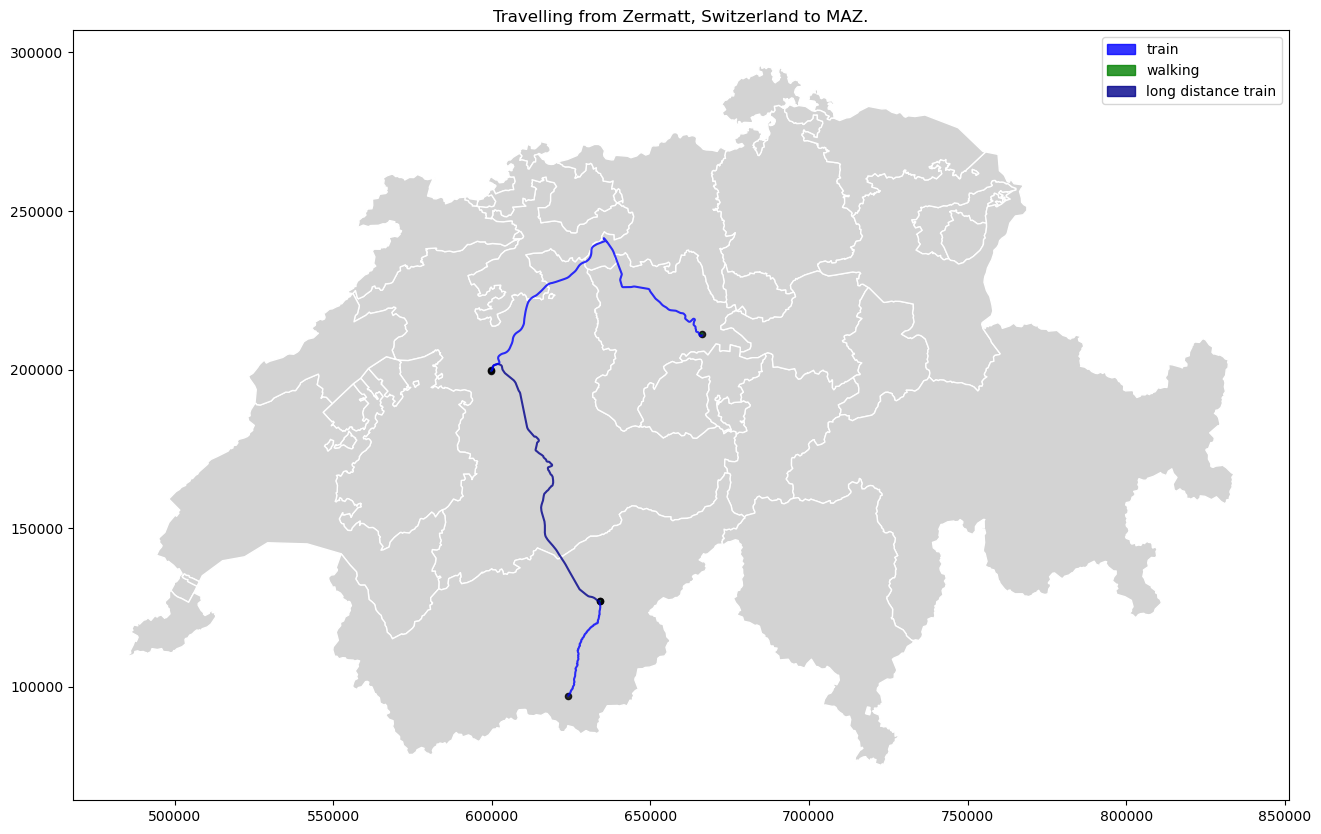

In [68]:
# Hintergrundkarte
ax = gdf_kantone.plot(figsize=(18,10), color='lightgrey', edgecolor='white')

# Strecken
gdf.plot(ax=ax, linewidth=1.5, color=colors, alpha=0.8)

# Startpunkte
gdf.set_geometry('startpoint').plot(ax=ax, color='black', markersize=20, alpha=0.8)

# Legende
plt.legend(handles=patches, loc=1)

ax.set_title("Travelling from " + origin + " to MAZ.")